In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\data science\SDN\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                       
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 


csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\data science\SDN\with attention and dimensionality reduction\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                         
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 

  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

        Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       0.033141  0.033141  0.033141  0.033141  0.033141  0.033141  0.033298   
1       0.033137  0.033137  0.033137  0.033137  0.033137  0.033137  0.033222   
2       0.033130  0.033130  0.033130  0.033130  0.033130  0.033130  0.033130   
3       0.032980  0.036678  0.032980  0.032980  0.032980  0.032980  0.034405   
4       0.033016  0.033016  0.033016  0.033016  0.033016  0.034375  0.034917   
...          ...       ...       ...       ...       ...       ...       ...   
275458  0.033169  0.034637  0.033963  0.033169  0.033169  0.033169  0.033169   
275459  0.033118  0.034607  0.033472  0.033118  0.033118  0.033118  0.033118   
275460  0.033136  0.033136  0.035065  0.033136  0.033136  0.033136  0.033136   
275461  0.033182  0.033358  0.033950  0.032805  0.032805  0.032805  0.033930   
275462  0.033602  0.033695  0.033298  0.032789  0.032789  0.032789  0.033400   

        Feature8  Feature9  Feature10  

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
df.shape

(343885, 31)

In [7]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

240719 Training sequences (240719, 30)
103166 Validation sequences (103166, 30)
240719 Training sequences (240719,)


In [9]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [17]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
25792/25792 [==============================] - 22s 841us/step - loss: 0.0506 - accuracy: 0.9856 - val_loss: 0.0424 - val_accuracy: 0.9907
Epoch 2/20
25792/25792 [==============================] - 19s 727us/step - loss: 0.0479 - accuracy: 0.9866 - val_loss: 0.0340 - val_accuracy: 0.9913
Epoch 3/20
25792/25792 [==============================] - 20s 771us/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 0.0428 - val_accuracy: 0.9879
Epoch 4/20
25792/25792 [==============================] - 19s 732us/step - loss: 0.0444 - accuracy: 0.9876 - val_loss: 0.0305 - val_accuracy: 0.9913
Epoch 5/20
25792/25792 [==============================] - 23s 880us/step - loss: 0.0426 - accuracy: 0.9883 - val_loss: 0.0397 - val_accuracy: 0.9899
Epoch 6/20
25792/25792 [==============================] - 21s 812us/step - loss: 0.0418 - accuracy: 0.9885 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 7/20
25792/25792 [==============================] - 20s 789us/step - loss: 0.0410 - accuracy: 0.9886

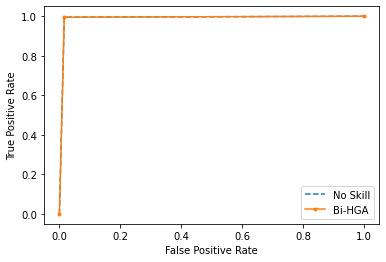

[0 0 0 ... 1 1 1]


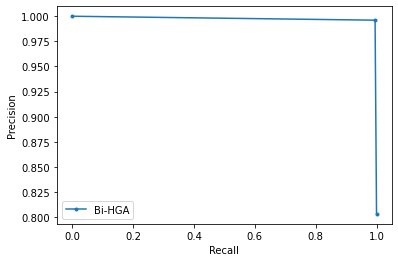

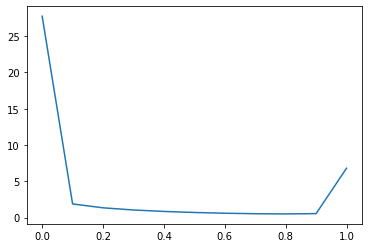

Epoch 1/20
25792/25792 [==============================] - 21s 804us/step - loss: 0.0364 - accuracy: 0.9900 - val_loss: 0.0303 - val_accuracy: 0.9931
Epoch 2/20
25792/25792 [==============================] - 22s 836us/step - loss: 0.0359 - accuracy: 0.9901 - val_loss: 0.0278 - val_accuracy: 0.9931
Epoch 3/20
25792/25792 [==============================] - 21s 801us/step - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 4/20
25792/25792 [==============================] - 21s 829us/step - loss: 0.0350 - accuracy: 0.9906 - val_loss: 0.0489 - val_accuracy: 0.9883
Epoch 5/20
25792/25792 [==============================] - 21s 802us/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0286 - val_accuracy: 0.9931
Epoch 6/20
25792/25792 [==============================] - 21s 820us/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.0882 - val_accuracy: 0.9744
Epoch 7/20
25792/25792 [==============================] - 22s 863us/step - loss: 0.0353 - accuracy: 0.9904

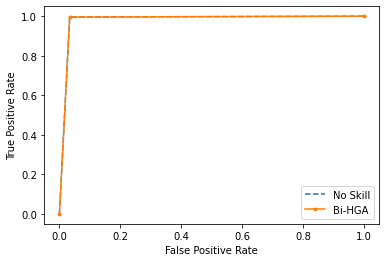

[0 0 0 ... 1 1 1]


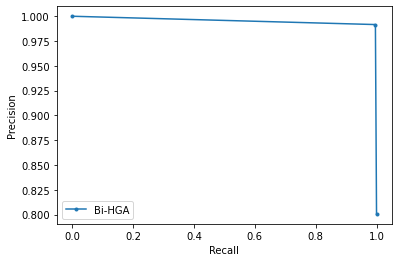

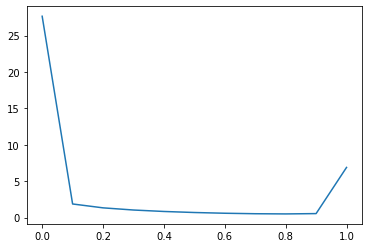

Epoch 1/20
25792/25792 [==============================] - 21s 818us/step - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0418 - val_accuracy: 0.9899
Epoch 2/20
25792/25792 [==============================] - 22s 845us/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.0241 - val_accuracy: 0.9938
Epoch 3/20
25792/25792 [==============================] - 22s 868us/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.0244 - val_accuracy: 0.9938
Epoch 4/20
25792/25792 [==============================] - 20s 783us/step - loss: 0.0342 - accuracy: 0.9907 - val_loss: 0.0379 - val_accuracy: 0.9891
Epoch 5/20
25792/25792 [==============================] - 22s 842us/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0239 - val_accuracy: 0.9939
Epoch 6/20
25792/25792 [==============================] - 22s 868us/step - loss: 0.0332 - accuracy: 0.9911 - val_loss: 0.0260 - val_accuracy: 0.9933
Epoch 7/20
25792/25792 [==============================] - 20s 790us/step - loss: 0.0339 - accuracy: 0.9908

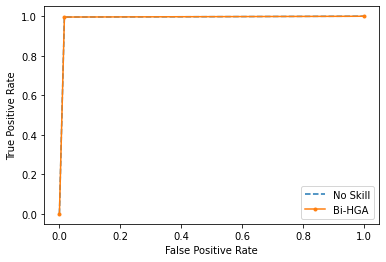

[0 0 0 ... 1 1 1]


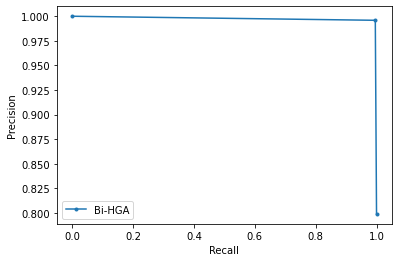

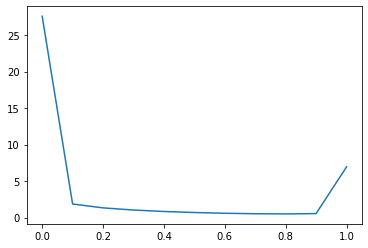

Epoch 1/20
25792/25792 [==============================] - 21s 812us/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.0232 - val_accuracy: 0.9938
Epoch 2/20
25792/25792 [==============================] - 21s 823us/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.0265 - val_accuracy: 0.9935
Epoch 3/20
25792/25792 [==============================] - 20s 774us/step - loss: 0.0318 - accuracy: 0.9916 - val_loss: 0.0234 - val_accuracy: 0.9938
Epoch 4/20
25792/25792 [==============================] - 20s 782us/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 5/20
25792/25792 [==============================] - 22s 842us/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.0264 - val_accuracy: 0.9924
Epoch 6/20
25792/25792 [==============================] - 20s 772us/step - loss: 0.0319 - accuracy: 0.9915 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 7/20
25792/25792 [==============================] - 22s 839us/step - loss: 0.0315 - accuracy: 0.9913

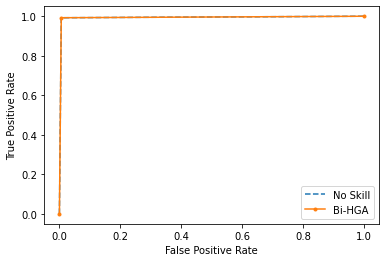

[0 0 0 ... 1 1 1]


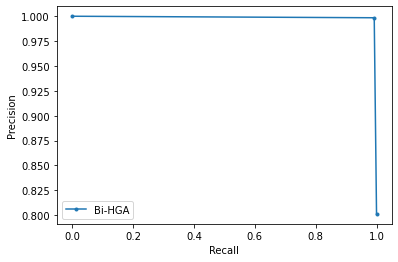

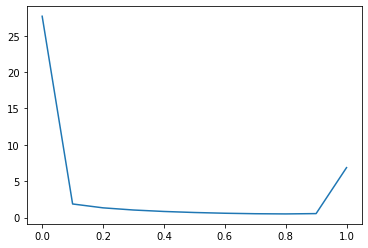

Cross Validation ROC - AUC = 0.9884644062390151
Cross Validation Precision recall curve - AUC = 0.9945395806746775
Cross Validation accuracy = 0.9923928038739362
Cross Validation f1 = 0.9952513487878177
Cross Validation precision = 0.9955153909876702
Cross Validation recall = 0.9949947155661655
Cross Validation fpr = [0.        0.0180659 1.       ]
Cross Validation tpr = [0.         0.99499472 1.        ]
Cross Validation lr_precision = [0.80103232 0.99551539 1.        ]
Cross Validation lr_recall = [1.         0.99499472 0.        ]


"\nns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)\nfpr, tpr, _ = roc_curve(y_val, predictions)\npyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')\npyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')\n"

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from importlib import reload
reload(plt)
#from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss

kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
aucs1=0
f1s=0
recalls=0
precisions=0
accuracys=0
lr_precisions=0
lr_recalls=0
fprs=0
tprs=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    predictions = [round(x[0]) for x in predictions]
    
 
    # make class predictions with the model
   # predictions1 =  model.predict>0.5.astype('int32')
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    #https://www.kaggle.com/vedbharti/classification-precision-recall-vs-roc-plot
    auc1=average_precision_score(y_val, predictions)
     
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, predictions)
    #lr_f1, lr_auc = f1_score(y_val, predictions1), auc(lr_recall, lr_precision)
    # summarize scores
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Bi-HGA')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
   
       
  
      
    # plot impact of logloss with imbalanced datasets
    from sklearn.metrics import log_loss
    from matplotlib import pyplot
    from numpy import array
    # define an imbalanced dataset
    testy = [0 for x in range(100)] + [1 for x in range(10)]
    # loss for predicting different fixed probability values
    predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    losses = [log_loss(y_val, [y for x in range(len(y_val))]) for y in predictions]
    # plot predictions vs loss
    pyplot.plot(predictions, losses)
    pyplot.show()
    
    aucs += auc
    aucs1 += auc1
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fprs+=fpr
    tprs+=tpr
    lr_recalls+=lr_recall
    lr_precisions+=lr_precision
print("Cross Validation ROC - AUC = {}".format(aucs/4))
print("Cross Validation Precision recall curve - AUC = {}".format(aucs1/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fprs/4))
print("Cross Validation tpr = {}".format(tprs/4))
print("Cross Validation lr_precision = {}".format(lr_precisions/4))
print("Cross Validation lr_recall = {}".format(lr_recalls/4))
'''
ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')
'''

In [19]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 28m 48s
